# Week 12

## Supervised Learning Continued:
    1. Decision tree
    2. Random forest

Importing libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
# Import Decision Tree Classifier
from sklearn.model_selection import train_test_split 
from sklearn import datasets
# Import train_test_split function
from sklearn import metrics 
#Import scikit-learn metrics module for accuracy calculation
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading data

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 
             'bmi', 'pedigree', 'age', 'label'] #label is the target variable

In [6]:
diabetes = pd.read_csv('diabetes.csv', header=0, names=col_names) #header을 0으로 두면 칼럼명을 재설정 할 수 있다

In [5]:
diabetes

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
corr = diabetes.corr()
corr

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


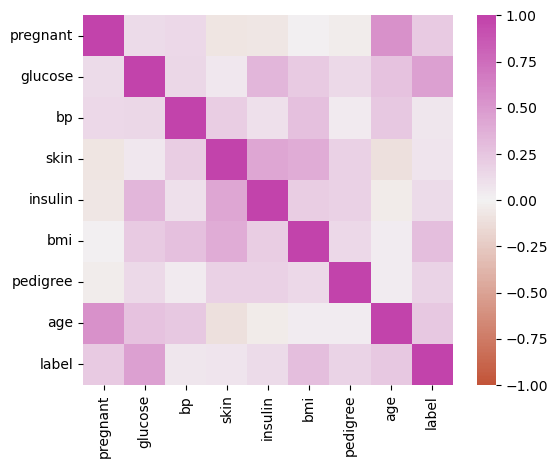

In [15]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,    
    cmap=sns.diverging_palette(20, 5000, n=200)
)

Features and targets

In [17]:
feature_cols = ['pregnant','glucose','bp', 
                'insulin', 'bmi', 'pedigree','age']

In [19]:
X = diabetes[feature_cols]
y = diabetes.label
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

In [21]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (537, 7)
X_test: (231, 7)
y_train: (537,)
y_test: (231,)


Now that we divided our data into train and test sets, let's use Gini-index first.

In [25]:
# Gini index?

clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

Model evaluation

In [26]:
print(metrics.accuracy_score(y_test, y_pred))

0.6796536796536796


Now let's try entropy technique.

In [28]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [29]:
print(metrics.accuracy_score(y_test, y_pred))

0.7359307359307359


## Visualization

In [30]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# this step, dot_data.getvalue() you generate your graph 
# from .dot data. 

graph.write_png('diabetes.png') # save image
Image(graph.create_png())


InvocationException: GraphViz's executables not found

In [31]:
#executables not found error
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
# os.environ["PATH"] += os.pathsep + 'C:Program Files (x86)/Graphviz2.38/bin/'

Another example

In [32]:
from sklearn import datasets

In [35]:
iris = datasets.load_iris()

In [36]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


use pandas and make it into dataframe (just like above)

In [40]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0], # first element
    'sepal width':iris.data[:,1], # second element
    'petal length':iris.data[:,2], # third
    'petal width':iris.data[:,3], # fourth
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
# X = iris.data
# y = iris.target

X = data[['sepal length', 'sepal width','petal length','petal width']]
y = data['species']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
iris_model = clf.fit(X_train, y_train)
# y_pred = iris_model.predict(X_test)
y_pred = iris_model.predict([4,3,5,2])
metrics.accuracy_score(y_test, y_pred)

C:\Users\sumin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[4. 3. 5. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
from sklearn import tree
import graphviz 
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [52]:
#another way to visualize

import dtreeviz
viz = dtreeviz(clf,
               iris['data'],
               iris['target'],
               target_name='species',
               feature_names=np.array(iris['feature_names']),
               class_names={0:'setosa',1:'versicolor',2:'virginica'})
              
viz.view()

TypeError: 'module' object is not callable. Did you mean: 'dtreeviz.dtreeviz(...)'?

## Random Forest

In [53]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  

y=data['species']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

Feature importance

In [59]:
feature_imp = pd.Series(rf.feature_importances_, index= iris.feature_names).sort_values(ascending=False)
feature_imp

# remove the non-significant variables for flattening (reducing dimensions)

petal length (cm)    0.461598
petal width (cm)     0.412249
sepal length (cm)    0.101144
sepal width (cm)     0.025009
dtype: float64

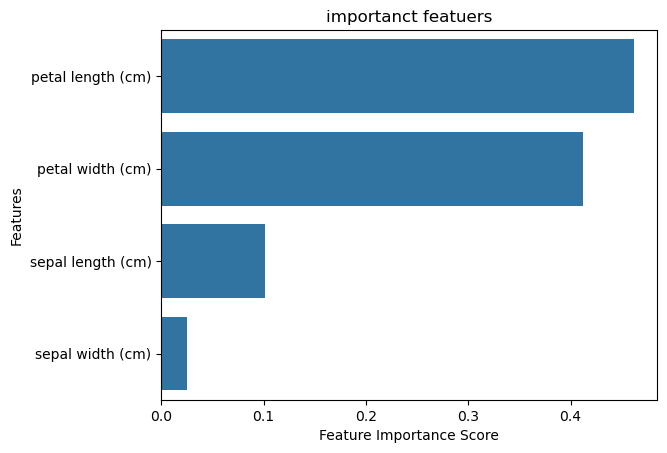

In [60]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('importanct featuers')
plt.show()